In [4]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tqdm

from tic_tac_toe import TicTacToe, TikTakCounter
from dqn_agent import DQNTrainer, DQN1
from dqn_duel_agent import DQNDuelTrainer

Реализуйте DQN с нейронной сетью, обучите стратегии крестиков и ноликов. Замечание: скорее всего, experience replay потребуется сразу же.

Стратегия реализована на основе примера из лекции и [пирмера из pytorch](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)

In [5]:
env = TicTacToe(4, 4, 4)
trainer = DQNTrainer(env, memory_size=60_000, batch_size=128)
counter = trainer.train(1, env, 100_000)

cross=5 naughts=0 tot=1665 draw=6 invalid=1654
cross=15 naughts=0 tot=3265 draw=9 invalid=3241
cross=24 naughts=0 tot=4880 draw=13 invalid=4843
cross=27 naughts=0 tot=6493 draw=15 invalid=6451
cross=36 naughts=0 tot=8096 draw=18 invalid=8042
cross=44 naughts=0 tot=9708 draw=23 invalid=9641
cross=46 naughts=0 tot=11336 draw=25 invalid=11265
cross=50 naughts=0 tot=12957 draw=25 invalid=12882
cross=56 naughts=0 tot=14589 draw=27 invalid=14506
cross=62 naughts=0 tot=16212 draw=29 invalid=16121
cross=73 naughts=0 tot=17836 draw=31 invalid=17732
cross=78 naughts=0 tot=19454 draw=37 invalid=19339
cross=86 naughts=0 tot=21096 draw=39 invalid=20971
cross=93 naughts=0 tot=22674 draw=41 invalid=22540
cross=98 naughts=0 tot=24309 draw=48 invalid=24163
cross=107 naughts=0 tot=25919 draw=51 invalid=25761
cross=111 naughts=0 tot=27514 draw=54 invalid=27349
cross=124 naughts=0 tot=29165 draw=58 invalid=28983
cross=129 naughts=0 tot=30760 draw=60 invalid=30571
cross=133 naughts=0 tot=32380 draw=65 inva

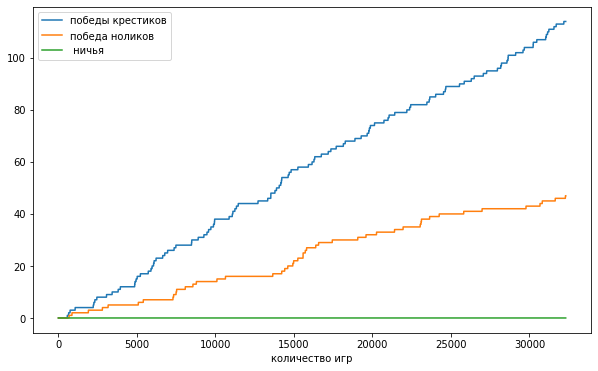

In [13]:
plt.figure(figsize=(10,6))
x, y = counter.tot_list,  counter.cross_list
ax1, = plt.plot(x,y, linestyle='-')

x, y = counter.tot_list,  counter.draw_list
ax2, = plt.plot(x,y, linestyle='-')

x, y = counter.tot_list,  counter.naughts_list
ax3, = plt.plot(x,y, linestyle='-')


plt.legend([ax1, ax2, ax3], ['победы крестиков', 'победа ноликов', ' ничья'])
plt.xlabel('количество игр')
plt.show()

In [7]:
invalid_perc = [float(inv)/float(tot) for inv, tot in zip(counter.invalid_list, counter.tot_list)]

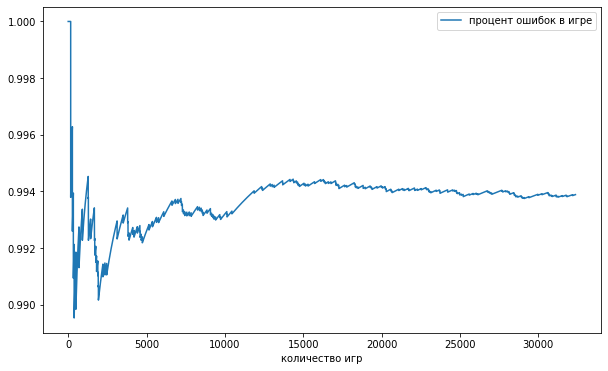

In [8]:
plt.figure(figsize=(10,6))
x, y = counter.tot_list,  invalid_perc
ax1, = plt.plot(x,y, linestyle='-')

plt.legend([ax1], ['процент ошибок в игре'])
plt.xlabel('количество игр')
plt.show()

Если dqn - агент не совершает ошибочного хода, то он выигрывает. Основную проблемы составляют ошибочные ходы, из графика видно, что их процент составляет достаточно большое количеств. Необходимо больше шагов обучения для их уменьшения.

In [9]:
env = TicTacToe(4, 4, 4)
trainer = DQNDuelTrainer(env, memory_size=60_000, batch_size=128)
counter = trainer.train(1, env, 100_000)

cross=4 naughts=0 tot=1620 draw=2 invalid=1614
cross=9 naughts=0 tot=3249 draw=5 invalid=3235
cross=14 naughts=0 tot=4893 draw=5 invalid=4874
cross=23 naughts=0 tot=6519 draw=7 invalid=6489
cross=28 naughts=0 tot=8135 draw=12 invalid=8095
cross=35 naughts=0 tot=9750 draw=14 invalid=9701
cross=43 naughts=0 tot=11370 draw=16 invalid=11311
cross=45 naughts=0 tot=13010 draw=16 invalid=12949
cross=54 naughts=0 tot=14616 draw=20 invalid=14542
cross=60 naughts=0 tot=16202 draw=27 invalid=16115
cross=66 naughts=0 tot=17819 draw=30 invalid=17723
cross=70 naughts=0 tot=19429 draw=31 invalid=19328
cross=77 naughts=0 tot=21036 draw=33 invalid=20926
cross=82 naughts=0 tot=22660 draw=35 invalid=22543
cross=86 naughts=0 tot=24286 draw=40 invalid=24160
cross=91 naughts=0 tot=25892 draw=41 invalid=25760
cross=95 naughts=0 tot=27506 draw=42 invalid=27369
cross=101 naughts=0 tot=29097 draw=42 invalid=28954
cross=107 naughts=0 tot=30694 draw=44 invalid=30543
cross=114 naughts=0 tot=32310 draw=47 invalid=3

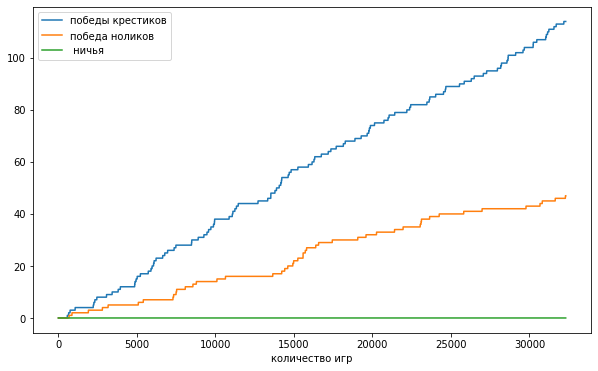

In [12]:
plt.figure(figsize=(10,6))
x, y = counter.tot_list,  counter.cross_list
ax1, = plt.plot(x,y, linestyle='-')

x, y = counter.tot_list,  counter.draw_list
ax2, = plt.plot(x,y, linestyle='-')

x, y = counter.tot_list,  counter.naughts_list
ax3, = plt.plot(x,y, linestyle='-')


plt.legend([ax1, ax2, ax3], ['победы крестиков', 'победа ноликов', ' ничья'])
plt.xlabel('количество игр')
plt.show()

In [11]:
invalid_perc = [float(inv)/float(tot) for inv, tot in zip(counter.invalid_list, counter.tot_list)]